<a href="https://colab.research.google.com/github/eneaiten/Codes_MT/blob/main/5step_3min_Parvo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np

file = "/content/ES_05_5step_3min_Parvo.xlsx"
gxt_raw = pd.read_excel(file, header=None)

# Trova la riga header ("Time")
start_row = gxt_raw[
    gxt_raw.apply(lambda r: r.astype(str).str.contains("Time", case=False, na=False)).any(axis=1)
].index[0]

# Trova la prima riga numerica dopo l'header
def is_real_number(x):
    if pd.isna(x):
        return False
    try:
        float(x)
        return True
    except:
        return False

numeric_start = gxt_raw.iloc[start_row+1:, 0].apply(is_real_number).idxmax()

# Seleziona solo la parte dai dati numerici in poi
sub_gxt = gxt_raw.iloc[numeric_start:, :]

# Trova il primo NaN nella colonna 0
first_nan_idx = sub_gxt[sub_gxt.iloc[:, 0].isna()].index
if len(first_nan_idx) > 0:
    last_valid_idx = first_nan_idx[0] - 1
else:
    last_valid_idx = sub_gxt.index[-1]

# Taglio definitivo
clean = sub_gxt.loc[:last_valid_idx].copy()

# Inserisci header
headers = gxt_raw.iloc[start_row].tolist()
clean.columns = headers

#reset index
clean.reset_index(drop=True, inplace=True)
clean.columns.values[12]='VE/VO2'
clean.columns.values[13]='VE/VCO2'


# Mostra tabella pulita
display(clean)
display(clean.info())


,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/VO2,VE/VCO2,PECO2,PEO2,PetCO2,PetO2
0,0.2765,0.570635,12.013359,3.432388,0.426975,18.178772,0.748247,28.93309,0.628304,17.303648,2.912694,89.5,31.857119,42.575691,21.583059,128.220032,21.871187,127.857269
1,2.798667,0.014377,0.302683,0.086481,0.010107,0.616649,0.70295,0.792969,0.777646,18.266102,2.044625,86.5,42.890087,61.01445,15.150673,135.351822,21.83853,126.4422
2,3.023667,0.774883,16.313328,4.660951,0.521608,22.309473,0.673144,31.111113,0.71709,16.983162,2.899775,85,28.79076,42.770569,21.487331,125.84523,21.97402,125.269783
3,3.250834,0.890145,18.739893,5.354255,0.591332,23.709225,0.66431,30.814379,0.769421,16.671434,3.090664,90,26.635242,40.094604,22.901821,123.535332,23.148537,123.234558
4,3.5075,0.980835,20.649168,5.899762,0.656088,25.504429,0.668907,31.168833,0.818267,16.56308,3.186481,91,26.00276,38.873482,23.61182,122.732422,23.819317,122.456718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,37.255825,2.65407,55.875156,15.964331,2.529786,94.06205,0.953172,59.327618,1.585468,17.523266,3.32905,167,35.440681,37.181816,24.668261,129.847397,24.924072,128.407593
112,37.501999,2.624106,55.244347,15.784099,2.536127,95.804169,0.966473,60.934322,1.572253,17.613939,3.277317,169,36.509254,37.775776,24.284916,130.519287,24.477198,128.981827
113,37.764496,2.652107,55.833843,15.952527,2.523573,92.19529,0.951535,57.142864,1.613417,17.45787,3.387407,169,34.763031,36.53363,25.100689,129.362823,25.36858,127.763466
114,38.014988,2.650023,55.789948,15.939985,2.500313,95.155998,0.943506,59.880241,1.589105,17.574593,3.253373,169,35.907619,38.057629,24.107494,130.227737,24.475142,128.71077


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TIME      116 non-null    object
 1   VO2       116 non-null    object
 2   VO2/kg    116 non-null    object
 3   METS      116 non-null    object
 4   VCO2      116 non-null    object
 5   VE        116 non-null    object
 6   RER       116 non-null    object
 7   RR        116 non-null    object
 8   Vt        116 non-null    object
 9   FEO2      116 non-null    object
 10  FECO2     116 non-null    object
 11  HR        116 non-null    object
 12  VE/VO2    116 non-null    object
 13  VE/VCO2   116 non-null    object
 14  PECO2     116 non-null    object
 15  PEO2      116 non-null    object
 16  PetCO2    116 non-null    object
 17  PetO2     116 non-null    object
dtypes: object(18)
memory usage: 16.4+ KB


None

In [67]:
# clean the file, we know have a new df called five_step with just the 5 step data
clean.columns = (clean.columns.str.strip().str.lower().str.replace(' ', '_')) # columns standardization, lower case + remove spaces
five_step = clean[(clean['time']>=5.1) & (clean['time']<=25.1)]
five_step.reset_index(drop=True, inplace=True) # drop: elimina il vecchio indice invece di salvarlo come colonna con nome 'index'; inplace=True: applica direttamente il nuovo indice senza creare una copia del df
display(five_step)

,time,vo2,vo2/kg,mets,vco2,ve,rer,rr,vt,feo2,feco2,hr,ve/vo2,ve/vco2,peco2,peo2,petco2,peto2
0,5.283666,0.917293,19.311422,5.517549,0.669097,24.383684,0.729426,31.393066,0.776722,16.600197,3.39619,87,26.582233,36.442684,25.165771,123.007462,25.368483,122.794724
1,5.517332,0.984454,20.725351,5.921529,0.692243,24.876637,0.703175,29.957201,0.830406,16.401344,3.443556,89,25.26947,35.936268,25.516748,121.533958,25.717257,121.373352
2,5.768832,1.221979,25.725872,7.350249,0.836398,29.524927,0.684462,31.809143,0.92819,16.213058,3.50495,97.5,24.16157,35.300079,25.971678,120.138763,26.185104,119.810287
3,6.030666,1.224941,25.788237,7.368068,0.87122,29.901304,0.711234,30.553787,0.978645,16.23316,3.603696,106.5,24.410398,34.321198,26.703386,120.287712,26.940596,120.096222
4,6.278333,1.266391,26.660864,7.61739,0.904329,30.442486,0.7141,32.301479,0.942449,16.157343,3.673362,101,24.038773,33.663048,27.21961,119.725914,27.427439,119.502968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,24.01034,2.37302,49.958324,14.273807,2.072044,70.650864,0.873168,48.979591,1.442455,16.941597,3.626735,162,29.772549,34.097176,26.874109,125.537231,27.07761,124.916664
76,24.257505,2.287928,48.166901,13.761971,2.042052,69.469864,0.892533,48.550232,1.430886,17.003107,3.634875,163,30.363661,34.019638,26.934422,125.993027,27.129766,125.699867
77,24.50267,2.296427,48.345833,13.813095,2.043467,70.125305,0.889846,48.946297,1.432699,17.02767,3.603747,163,30.536701,34.316826,26.703766,126.175034,26.901125,125.868759
78,24.764669,2.229975,46.946838,13.413383,1.972636,67.264481,0.8846,45.801521,1.468608,16.983757,3.626545,163,30.163786,34.098785,26.8727,125.84964,27.088221,125.53791


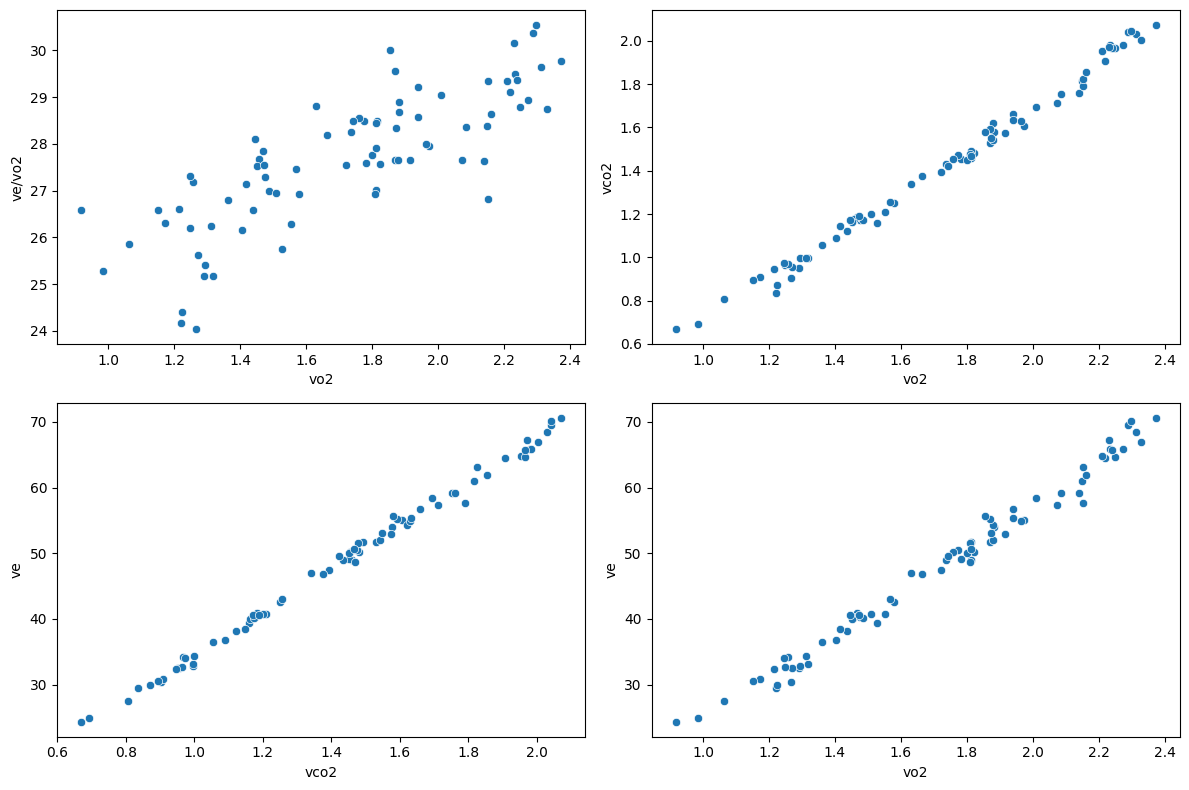

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(12,8))
sns.scatterplot(data=five_step, x='vo2', y='ve/vo2', ax=axes[0,0])
sns.scatterplot(data=five_step, x='vo2', y='vco2', ax=axes[0,1])
sns.scatterplot(data=five_step, x='vco2', y='ve', ax=axes[1,0])
sns.scatterplot(data=five_step, x='vo2', y='ve', ax=axes[1,1])

# valori opzionali
vline_x = None      # linea verticale
hline_y = None      # linea orizzontale

# aggiungi linee solo se il valore è definito
if vline_x is not None:
    axes[0,0].axvline(x=vline_x, color='red', linestyle='--')

if hline_y is not None:
    axes[0,0].axhline(y=hline_y, color='blue', linestyle='--')


plt.tight_layout()
plt.show()


In [69]:
# Parametri
points_per_step = 16   # es: ogni step ha 3 righe
last_points = 4        # quanti punti finali per step considerare
max_step = 5          # numero di step da analizzare (opzionale)

df = five_step.copy()     # il DataFrame già pulito

#creo il contenitore vuoto con nome last_points_rows
last_points_rows = pd.DataFrame()

for step in range(max_step): #parte da 0 e va fino a 7
    # Indici dell'inizio e della fine dello step
    start_idx = step * points_per_step
    end_idx = (step + 1) * points_per_step - 1

    # Prendi gli ultimi 'last_points' righe dello step
    # Range(start, stop) -> genera tutti i numeri da start fino a stop -1
    # list() -> trasforma in lista per poterlo usare come lista di indici da passare a df.iloc
    last_rows_idx = list(range(end_idx - last_points + 1, end_idx + 1))

    # Controlla che gli indici siano validi
    last_rows_idx = [i for i in last_rows_idx if i < len(df)]

    # Aggiungi queste righe
    # pd.concat([x, y]) -> aggiungi dataset y a x verticalmente
    last_points_rows = pd.concat([last_points_rows, df.iloc[last_rows_idx]])

# Aggiungi colonna Step
# Vogliamo assegnare a ogni riga il numero dello step a cui appartiene
# i// si chiama floor division o divisione intera, serve a capire a quale step appartiene il punto
# Esempio numerico:
#points_per_step = 3
# Indici DataFrame: 0,1,2 → step 1 → 0//3=0, 1//3=0, 2//3=0
# Indici 3,4,5 → step 2 → 3//3=1, 4//3=1, 5//3=1
# +1 per far partire la numerazione degli step da 1 invece che da 0
last_points_rows['Step'] = [i // points_per_step + 1 for i in last_points_rows.index]

display(last_points_rows)
# Calcola media per step
step_means = last_points_rows.groupby('Step').mean().reset_index()
sub_step_means = step_means[['Step','hr','vo2','vco2','ve', 've/vo2','ve/vco2']]
display (sub_step_means)

,time,vo2,vo2/kg,mets,vco2,ve,rer,rr,vt,feo2,feco2,hr,ve/vo2,ve/vco2,peco2,peo2,petco2,peto2,Step
12,8.277667,1.062964,22.378189,6.393768,0.807313,27.496298,0.759492,31.620554,0.86957,16.450531,3.630999,111,25.867573,34.059025,26.905703,121.898438,27.172928,121.471664,1
13,8.518001,1.318184,27.751232,7.928924,0.997767,33.184769,0.756926,33.287102,0.996926,16.329567,3.717381,107,25.17462,33.259041,27.545794,121.00209,30.664392,120.56366,1
14,8.750168,1.311256,27.605389,7.887254,0.999291,34.407043,0.762087,34.458004,0.998521,16.511679,3.59215,112,26.239761,34.431465,26.61783,122.35154,28.539886,122.089134,1
15,9.016502,1.257373,26.471018,7.563148,0.967269,34.174473,0.769277,33.79224,1.011311,16.657976,3.501705,115,27.179256,35.330891,25.947632,123.4356,26.176786,123.04142,1
28,12.271675,1.416704,29.825354,8.521529,1.147134,38.452316,0.80972,36.241611,1.060999,16.613958,3.688588,130,27.14209,33.520348,27.332436,123.109428,27.525976,122.878914,2
29,12.502009,1.578617,33.234039,9.49544,1.249298,42.512047,0.791388,39.073807,1.087994,16.597311,3.634118,129,26.929934,34.028748,26.928816,122.986076,27.165197,122.733002,2
30,12.774676,1.44637,30.4499,8.699971,1.171063,40.63348,0.809657,36.674816,1.10794,16.760508,3.564762,133,28.093416,34.697933,26.414885,124.195358,26.611145,123.883392,2
31,13.012842,1.473299,31.016817,8.861948,1.189057,40.578934,0.807071,37.788662,1.073839,16.679377,3.623737,132,27.542908,34.126984,26.851892,123.594177,27.119459,123.346619,2
44,16.270176,1.62993,34.31432,9.804091,1.340438,46.96006,0.82239,43.593128,1.077235,16.8533,3.530987,147,28.811085,35.03336,26.164614,124.882957,26.387161,124.555367,3
45,16.518175,1.808796,38.07991,10.879974,1.469092,48.720818,0.812193,44.354836,1.098433,16.578428,3.727798,146,26.935501,33.163898,27.622984,122.846153,27.961206,122.430336,3


,Step,hr,vo2,vco2,ve,ve/vo2,ve/vco2
0,1,111.25,1.237444,0.94291,32.315646,26.115303,34.270105
1,2,131.0,1.478748,1.189138,40.544194,27.427087,34.093503
2,3,147.25,1.745358,1.421,48.827099,28.000524,34.380125
3,4,154.5,2.024244,1.700311,57.702303,28.540698,33.958439
4,5,163.0,2.285741,2.015577,68.453962,29.954396,33.960984


In [70]:
sub_step_means.to_excel('ES05_fivestep_PLA.xlsx', index=False)